Kmeans Clusters
[2 2 2 1 1 1 1 2 1 1 2 0 2 1 2 0 0 1 2 2 1 1 0 2 0 1 1 2 1 1 1 1 2 0 1 1 2
 1 2 0 0 1 2 1 1 1 1 2 2 0 1 2 0 0 2 2 1 2 1 2 0 0 2 1 2 1 2 2 1 1 2 2 0 2
 1 1 0 2 1 1 1 1 1 2 0 2 2 1 1 1 2 1 0 2 1 2 1 2 1 1 1 0 2 1 1 2 2 1 2 0 0
 0 2 2 0 1 1 0 1 2 1 2 0 2 2 2 1 1 0 1 1 2 2 2 2 1 1 2 2 2 0 1 1 2 2 2 1 1
 1 1 1 1 2 1 2 0 1 1 0 1 2 1 1 1 1 1 2 0 1 1 2 1 1 1 2 1 1 2 0 2 1 2 2 0 0
 0 1 1 1 1 1 1 1 2 1 0 2 1 1 2] 

[[111220.58823529   7411.02941176]
 [ 24208.42105263   5267.63157895]
 [ 65391.54929577   6175.70422535]] 



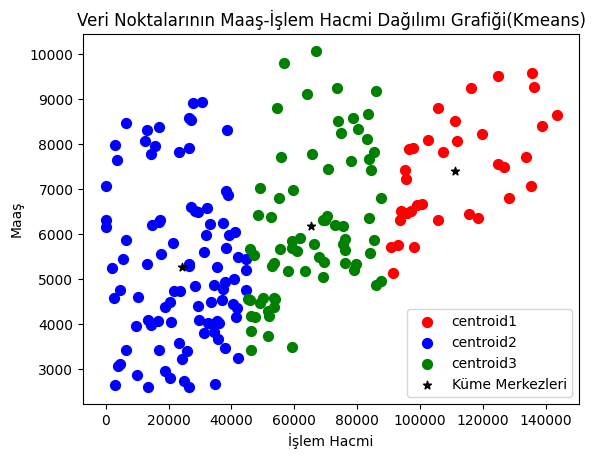

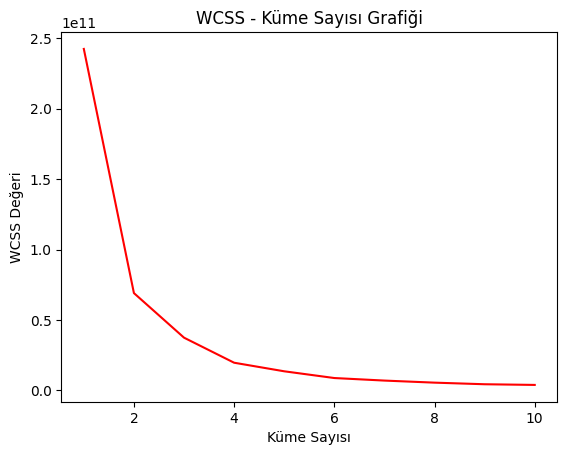


Agglomerative Hierarchical Clustering Clusters
[0 0 0 2 2 2 2 0 2 1 1 0 1 2 0 0 0 2 0 0 2 2 0 1 0 1 2 0 2 1 2 1 1 0 1 1 1
 2 1 0 0 2 0 2 2 1 1 1 1 0 2 0 0 0 0 0 2 0 1 0 0 0 1 2 1 2 1 0 1 2 0 0 0 0
 2 2 0 0 1 2 2 2 1 1 0 0 0 1 2 2 0 2 0 1 2 1 2 0 2 2 1 0 0 2 2 0 0 1 1 0 0
 0 0 0 0 1 2 0 1 1 2 1 0 0 0 1 2 2 0 2 2 1 1 1 1 2 1 1 0 1 0 2 1 1 0 1 1 1
 1 2 1 1 0 2 1 0 2 1 0 2 1 1 2 1 2 1 1 0 2 2 0 2 2 1 1 2 2 1 0 1 1 0 1 0 0
 0 2 2 1 2 1 2 1 0 2 0 0 1 1 1] 

[[128464.28571429   8025.        ]
 [ 40786.66666667   4972.5       ]
 [ 73830.           6511.25      ]
 [ 16040.           5159.        ]
 [100458.82352941   7236.76470588]
 [ 29009.67741935   5376.61290323]
 [  3466.66666667   5453.33333333]
 [ 61676.92307692   6651.92307692]
 [ 85993.75         6767.1875    ]
 [ 51978.94736842   5468.42105263]] 



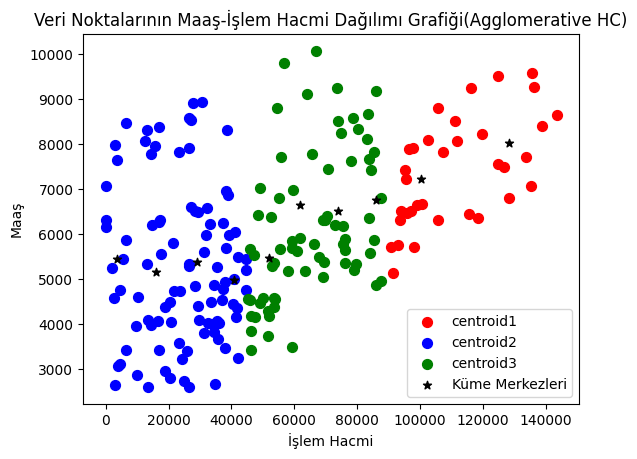

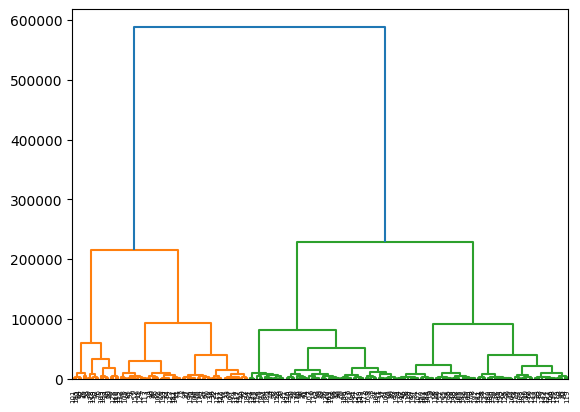

In [23]:
#kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#verinin yüklenmesi

veriler = pd.read_csv('/content/drive/MyDrive/Colab Notebooks(ML)/CLUSTERING/HIERARCHICAL_CLUSTERING/musteriler.csv')

#veri önişleme
x = veriler.iloc[:, 3:5]
X = x.values

#K_MEANS YÖNTEMİ
#model oluşturumu ve eğitimi
kmeans = KMeans(n_clusters= 3, init='k-means++', random_state = 0)
y_tahmin = kmeans.fit_predict(X)
print("Kmeans Clusters")
print(y_tahmin, '\n')

#verilerin görselleştirimi
centers = kmeans.cluster_centers_
print(centers, '\n')
plt.scatter(X[y_tahmin == 0, 0], X[y_tahmin == 0, 1], s=50, color='red', label='centroid1')
plt.scatter(X[y_tahmin == 1, 0], X[y_tahmin == 1, 1], s=50, color='blue', label='centroid2')
plt.scatter(X[y_tahmin == 2, 0], X[y_tahmin == 2, 1], s=50, color='green', label='centroid3')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', label='Küme Merkezleri', color='black')
plt.xlabel("İşlem Hacmi")
plt.ylabel("Maaş")
plt.title("Veri Noktalarının Maaş-İşlem Hacmi Dağılımı Grafiği(Kmeans)")
plt.legend()
plt.show()
print()


#WCSS yöntemi ile dirsek noktası belirleyip küme sayısına karar verme

wcss_values_list = []

for i in range(0,10):
  kmeans = KMeans(n_clusters= i+1, init='k-means++', random_state = 0)
  kmeans.fit(X)
  wcss_values_list.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_values_list, color='red')
plt.title("WCSS - Küme Sayısı Grafiği")
plt.xlabel("Küme Sayısı")
plt.ylabel("WCSS Değeri")
plt.show()
print()

#HIERARCHICAL CLUSTERING YÖNTEMİ(AGGLOMERATIVE)
#model oluşturumu ve eğitimi
ahc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_pred = ahc.fit_predict(X)
print("Agglomerative Hierarchical Clustering Clusters")
print(y_pred, '\n')

#verilerin görselleştirimi
centers = kmeans.cluster_centers_
print(centers, '\n')
plt.scatter(X[y_tahmin == 0, 0], X[y_tahmin == 0, 1], s=50, color='red', label='centroid1')
plt.scatter(X[y_tahmin == 1, 0], X[y_tahmin == 1, 1], s=50, color='blue', label='centroid2')
plt.scatter(X[y_tahmin == 2, 0], X[y_tahmin == 2, 1], s=50, color='green', label='centroid3')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', label='Küme Merkezleri', color='black')
plt.xlabel("İşlem Hacmi")
plt.ylabel("Maaş")
plt.title("Veri Noktalarının Maaş-İşlem Hacmi Dağılımı Grafiği(Agglomerative HC)")
plt.legend()
plt.show()
print()


#dendogram oluşturulması
from scipy.cluster import hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()
